In [ ]:
pip install matplotlib

In [21]:
import pandas as pd
import string
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_docs_uoc = pd.read_excel('data/corpus_con_variaciones_20240427_uoc_ofuscado.xlsx')
df_docs_uoc = df_docs_uoc.dropna(subset=['body texto'])
df_docs_uoc.head()

,Unnamed: 0,CODIGO_FAQ,title_found,texto,variaciones,num_variaciones,motivo,intent,num_tokens
0,0,433243,Visa Lidl para empleados del grupo Lidl,¿A quién está dirigida? La Visa Lidl Empleado ...,"['Tarjeta para empleados Lidl', 'solicitar UNA...",22,NaN,Visa_Lidl_para_empleados_del_grupo_Lidl,1007
1,1,419915,¿Cómo puedo anular el cobro de una liquidación...,¿Cómo puedo anular el cobro de una liquidación...,"['Anular cobro liquidación tarjeta oficina', '...",20,NaN,_Como_puedo_anular_el_cobro_de_una_liquidacion...,74
2,2,421998,¿Cómo puedo modificar un contrato de tarjeta p...,¿Cómo puedo modificar un contrato de tarjeta p...,"['motivo cambio de límite Tarjeta', 'como renu...",18,NaN,_Como_puedo_modificar_un_contrato_de_tarjeta_p...,122
3,3,423029,¿Cómo modificar la forma o importe de cobro de...,¿Cuál es la comisión por recargar una tarjeta ...,['Qué hago para cambiar la forma de cobro de l...,21,NaN,Como_modificar_la_forma_o_importe_de_cobro_de_...,380
4,4,422618,¿Cuáles son los plazos de recepción de las tar...,¿De que depende el plazo de recepción de las t...,['Por dónde veo los plazos de recepción de las...,29,NaN,Cuales_son_los_plazos_de_recepcion_de_las_tarj...,680


In [4]:
MAX_LENGTH = 250
MIN_LENGTH = 50

In [5]:
def get_chunks(text):
    chunks = []
    chunk = ''
    spli = text.split('. ')
    if len(spli)==1:
        chunks =  [text]
    else:
        for c in spli:
            if len(chunk) + len(c) < MAX_LENGTH:
                chunk += c
            else:
                if len(chunk)>0:
                    chunks.append(chunk)
                chunk = c
        if len(chunk) > 0:
            if len(chunk)<MIN_LENGTH:
                chunks[len(chunks)-1] = chunks[len(chunks)-1] + chunk
            else:
                chunks.append(chunk)
    l = []
    return chunks

In [6]:
def split_by_line_break(text):
    MIN_CHUNK = 10
    chunks = []
    for i in text.split('\n'):
        if len(i)>MIN_CHUNK:
            chunks.append(i)
    return chunks

In [33]:
df_docs_uoc['chunks'] = df_docs_uoc['texto'].apply(get_chunks)

In [30]:
df_docs_uoc['chunks2'] = df_docs_uoc['texto'].apply(split_by_line_break)

In [34]:
df_docs_uoc.head()

,Unnamed: 0,CODIGO_FAQ,title_found,texto,variaciones,num_variaciones,motivo,intent,num_tokens,chunks,chunks1,chunks2
0,0,433243,Visa Lidl para empleados del grupo Lidl,¿A quién está dirigida? La Visa Lidl Empleado ...,"['Tarjeta para empleados Lidl', 'solicitar UNA...",22,NaN,Visa_Lidl_para_empleados_del_grupo_Lidl,1007,[¿A quién está dirigida? La Visa Lidl Empleado...,[¿A quién está dirigida? La Visa Lidl Empleado...,[¿A quién está dirigida? La Visa Lidl Empleado...
1,1,419915,¿Cómo puedo anular el cobro de una liquidación...,¿Cómo puedo anular el cobro de una liquidación...,"['Anular cobro liquidación tarjeta oficina', '...",20,NaN,_Como_puedo_anular_el_cobro_de_una_liquidacion...,74,[¿Cómo puedo anular el cobro de una liquidació...,[¿Cómo puedo anular el cobro de una liquidació...,[¿Cómo puedo anular el cobro de una liquidació...
2,2,421998,¿Cómo puedo modificar un contrato de tarjeta p...,¿Cómo puedo modificar un contrato de tarjeta p...,"['motivo cambio de límite Tarjeta', 'como renu...",18,NaN,_Como_puedo_modificar_un_contrato_de_tarjeta_p...,122,[¿Cómo puedo modificar un contrato de tarjeta ...,[¿Cómo puedo modificar un contrato de tarjeta ...,[¿Cómo puedo modificar un contrato de tarjeta ...
3,3,423029,¿Cómo modificar la forma o importe de cobro de...,¿Cuál es la comisión por recargar una tarjeta ...,['Qué hago para cambiar la forma de cobro de l...,21,NaN,Como_modificar_la_forma_o_importe_de_cobro_de_...,380,[¿Cuál es la comisión por recargar una tarjeta...,[¿Cuál es la comisión por recargar una tarjeta...,[¿Cuál es la comisión por recargar una tarjeta...
4,4,422618,¿Cuáles son los plazos de recepción de las tar...,¿De que depende el plazo de recepción de las t...,['Por dónde veo los plazos de recepción de las...,29,NaN,Cuales_son_los_plazos_de_recepcion_de_las_tarj...,680,[¿De que depende el plazo de recepción de las ...,[¿De que depende el plazo de recepción de las ...,[¿De que depende el plazo de recepción de las ...


In [35]:
print(df_docs_uoc['chunks2'].apply(len).sum())

4498


In [36]:
df_chunked = df_docs_uoc.explode('chunks2')

In [37]:
df_chunked['len_chunks'] = df_chunked['chunks'].apply(len)

In [17]:
df_chunked = df_chunked.drop(columns='chunks').drop_duplicates()

<Axes: >

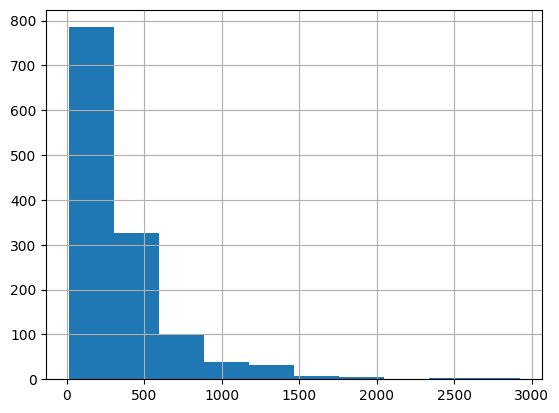

In [22]:
df_chunked['len_chunks'].hist()

In [23]:
from sentence_transformers import SentenceTransformer

def embeddings_GIST(docs: list[str]):
    model = SentenceTransformer("avsolatorio/GIST-small-Embedding-v0")
    embeddings = model.encode(docs, convert_to_tensor=False)
    return embeddings

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [39]:
df_chunked['embeddings'] = df_chunked['chunks2'].apply(embeddings_GIST)
df_chunked.to_pickle('data/corpus_chunked_linebreak.pkl')

In [28]:
print(df_chunked.columns)

Index(['Unnamed: 0', 'CODIGO_FAQ', 'title_found', 'texto', 'variaciones',
       'num_variaciones', 'motivo', 'intent', 'num_tokens', 'len_chunks'],
      dtype='object')


In [ ]:
# Defining cosine similarity 
def compute_cosine_similarity(a,b): 
    cos_sim = np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))
    return (cos_sim)

In [ ]:
def getTop(uq_emb, df2, th_min=0.85, th_dif=0.05):
    df2['cosine_sim'] = df2['embedding'].apply(lambda x: compute_cosine_similarity(uq_emb, x))
    df2 = df2.sort_values(by='cosine_sim',ascending=False).drop_duplicates(subset='punto norma')
    # df2 = df2[df2['cosine_sim2']>th_min].reset_index(drop=True)
    # df2 = df2[df2['cosine_sim2']>(df2['cosine_sim2'].max()-th_dif)]
    # print(df2['cosine_sim2'].values)
    return df2['chunks'].values[:4], df2['cosine_sim'].values#, df2['texto'].values]

In [ ]:
df_test = pd.read_csv('data/test_queries.csv',sep="|")

In [ ]:
df_test['getTop'] = df_test['embedding'].apply(lambda x: getTop(x, df_chunked))
df_test['results'] = df_test['getTop'].apply(lambda x: x[0])
df_test['scores'] = df_test['getTop'].apply(lambda x: x[1])

In [ ]:
df_test['scores0'] = df_test['scores'].apply(lambda x: x[0])
df_test['top4'] = df_test.apply(lambda x: x['chunks'] in x['results'], axis=1)
df_test['top1'] = df_test.apply(lambda x: x['chunks']==x['results'][0], axis=1)

In [ ]:
df_test['top4'].sum()/len(df_test)

In [ ]:
df_test['top1'].sum()/len(df_test)

In [ ]:
plt.hist(df_test[df_test['top4']]['scores0'], color = "blue", alpha=0.5)
plt.hist(df_test[~df_test['top4']]['scores0'], color = "red", alpha=0.5)

In [ ]:
df_test[~df_test['top1']].sort_values(by='scores0',ascending=False)